In [223]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import sklearn as datasets
from scipy.stats import linregress
import numpy as np

In [95]:
#import data files
mouse_data_path = r'C:\Users\ashle\matplotlib-challenge\05-Matplotlib\Pymaceuticals\data\Mouse_metadata.csv'
study_results_path = r'C:\Users\ashle\matplotlib-challenge\05-Matplotlib\Pymaceuticals\data\Study_results.csv'

In [96]:
#import csv
mouse_data = pd.read_csv(mouse_data_path)
study_results = pd.read_csv(study_results_path)

In [97]:
#merge the 2 data sets
merged_data = pd.merge(mouse_data, study_results, on="Mouse ID")
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [98]:
#get the number of mice
unique_mice = merged_data["Mouse ID"].unique()
unique_mice_count = len(unique_mice)
unique_mice_count

249

In [99]:
#get the duplicate mice by ID number that shows up for Mouse ID and timepoint
cleaned_data = merged_data.drop_duplicates(["Mouse ID","Timepoint"])
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [100]:
#confirm number of mice in clean data
unique_mice_cleaned = cleaned_data["Mouse ID"].unique()
unique_mice_cleaned = len(unique_mice_cleaned)


In [101]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumordata_mean = cleaned_data["Tumor Volume (mm3)"].mean() 
tumordata_median = cleaned_data["Tumor Volume (mm3)"].median() 
variance_tumordata = np.var(cleaned_data["Tumor Volume (mm3)"], ddof= 0)
std_tumordata = np.std(cleaned_data["Tumor Volume (mm3)"], ddof= 0)


In [102]:
summary_statistics = pd.DataFrame({"Mean" : [tumordata_mean],"Median": [tumordata_median], "Variance": [variance_tumordata], "Standard Deviation": [std_tumordata]})
summary_statistics.head()

,Mean,Median,Variance,Standard Deviation
0,50.449276,48.951421,79.24928,8.902206


In [103]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
groupby_regimen = cleaned_data.groupby(["Drug Regimen"])


In [104]:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
groupby_mean = groupby_regimen["Tumor Volume (mm3)"].mean() 
groupby_median = groupby_regimen["Tumor Volume (mm3)"].median() 
groupby_std = groupby_regimen["Tumor Volume (mm3)"].std()
groupby_var = groupby_regimen["Tumor Volume (mm3)"].var()
groupby_drug = groupby_regimen["Drug Regimen"].unique()
print(groupby_drug)
print(groupby_median)

Drug Regimen
Capomulin    [Capomulin]
Ceftamin      [Ceftamin]
Infubinol    [Infubinol]
Ketapril      [Ketapril]
Naftisol      [Naftisol]
Placebo        [Placebo]
Propriva      [Propriva]
Ramicane      [Ramicane]
Stelasyn      [Stelasyn]
Zoniferol    [Zoniferol]
Name: Drug Regimen, dtype: object
Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64


In [109]:
# Assemble the resulting series into a single summary dataframe.
summary_statistics = pd.DataFrame({"Mean": groupby_mean, "Median": groupby_median, "Standard Dev": groupby_std,"Variance": groupby_var})
summary_statistics.head(10)

,Mean,Median,Standard Dev,Variance
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764
Ceftamin,52.591172,51.776157,6.268188,39.290177
Infubinol,52.884795,51.820584,6.567243,43.128684
Ketapril,55.235638,53.698743,8.279709,68.553577
Naftisol,54.331565,52.509285,8.134708,66.173479
Placebo,54.033581,52.288934,7.821003,61.168083
Propriva,52.393463,50.909965,6.568014,43.138803
Ramicane,40.216745,40.673236,4.846308,23.486704
Stelasyn,54.233149,52.431737,7.710419,59.450562


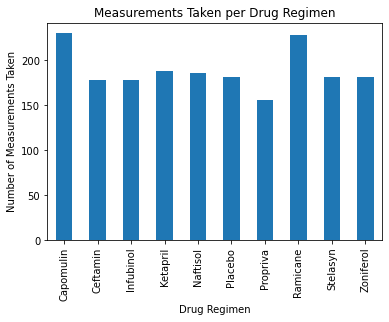

In [110]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas
drug_group = cleaned_data.groupby('Drug Regimen')
drug_count = drug_group['Tumor Volume (mm3)'].count()
drug_chart = drug_count.plot(kind="bar", title="Measurements Taken per Drug Regimen")
drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel("Number of Measurements Taken")
plt.show()


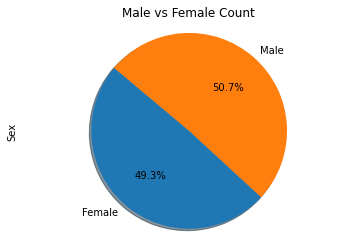

In [111]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#find sum of male and female mice
gender_group = cleaned_data.groupby('Sex')
gender_count = gender_group['Sex'].count()
gender_pie = gender_count.plot(kind="pie", shadow=True, startangle=140,autopct="%1.1f%%", title=("Male vs Female Count"))
plt.axis("equal")
plt.show()



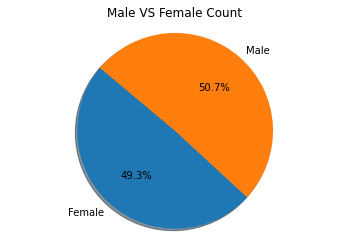

In [121]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels= ["Female","Male"]
plt.pie(gender_count,labels=labels,autopct="%1.1f%%",shadow=True, startangle=140)
plt.title('Male VS Female Count')
plt.axis("equal")
plt.show()

In [113]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
tumor_final = cleaned_data.groupby(['Mouse ID'])['Timepoint'].max().reset_index()
#merge data frame
merged_tumor_volume = tumor_final.merge(cleaned_data, on=["Mouse ID", "Timepoint"],how='left')
merged_tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [127]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimens = ['Capomulin','Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_volume =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimens in drug_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volume_bydrug = merged_tumor_volume.loc[merged_tumor_volume["Drug Regimen"]==regimens,'Tumor Volume (mm3)']
    
    # add subset 
    final_volume.append(final_volume_bydrug)
    #print(final_volume_bydrug)
    # Determine outliers using upper and lower bounds
    quartiles = final_volume_bydrug.quantile([.25,.5,.75])
    lower_q = quartiles[.25]
    upper_q = quartiles[.75]
    print(f"The lower quartile for {regimens} tumor volume is: {lower_q}")
    print(f"The upper quartile {regimens} tumor volume is: {upper_q}")
    print(f"The interquartile range {regimens} tumor volume is: {iqr}")
    print(f"The the median {regimens} tumor volume is: {quartiles[0.5]} ")

    iqr=upper_q-lower_q
    lower_bound=lower_q-(1.5 * iqr)
    upper_bound=upper_q + (1.5 * iqr)
    outlier=final_volume_bydrug.loc[(final_volume_bydrug<lower_bound) | (final_volume_bydrug>upper_bound)]
    print(f"Values below {lower_bound} could be outliers for {regimens}.")
    print(f"Values above {upper_bound} could be outliers for {regimens}.")
    

The lower quartile for Capomulin tumor volume is: 32.37735684
The upper quartile Capomulin tumor volume is: 40.1592203
The interquartile range Capomulin tumor volume is: 15.577752179999997
The the median Capomulin tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers for Capomulin.
Values above 51.83201549 could be outliers for Capomulin.
The lower quartile for Ramicane tumor volume is: 31.56046955
The upper quartile Ramicane tumor volume is: 40.65900627
The interquartile range Ramicane tumor volume is: 7.781863460000004
The the median Ramicane tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers for Ramicane.
Values above 54.30681135 could be outliers for Ramicane.
The lower quartile for Infubinol tumor volume is: 54.04860769
The upper quartile Infubinol tumor volume is: 65.52574285
The interquartile range Infubinol tumor volume is: 9.098536719999998
The the median Infubinol tumor volume is: 60.16518046 
Values below 36.832904

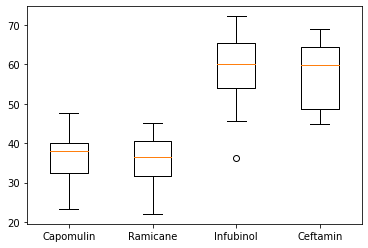

In [115]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(final_volume, labels=drug_regimens)
plt.show()

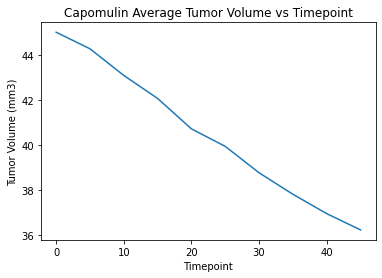

In [128]:
#Line and Scatter Plots
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_line=cleaned_data.loc[(cleaned_data['Drug Regimen'] == 'Capomulin'), ['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]
capomulin_group = capomulin_line.groupby('Timepoint').mean()

capomulin_lineplot = plt.plot(capomulin_group['Tumor Volume (mm3)'])
plt.title('Capomulin Average Tumor Volume vs Timepoint')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.show()


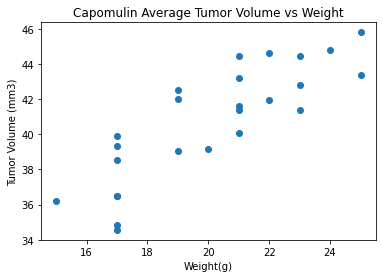

In [129]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_line=cleaned_data.loc[cleaned_data['Drug Regimen'] == 'Capomulin']
average_weight = capomulin_line.groupby(['Mouse ID']).mean()
capomulin_scatterplot = plt.scatter(average_weight['Weight (g)'], average_weight['Tumor Volume (mm3)'])
plt.title('Capomulin Average Tumor Volume vs Weight')
plt.xlabel('Weight(g)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

In [207]:
capomulin_line.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


The correlation between both factors is 0.53


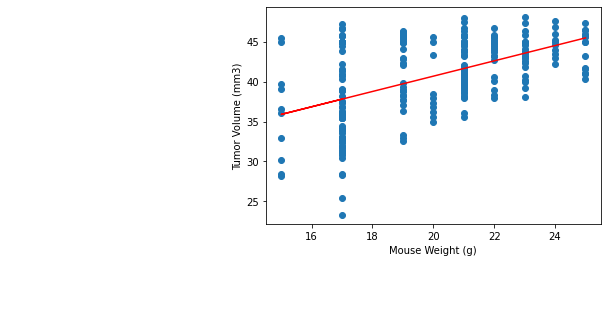

In [224]:
#Corrlation and Regression
# Calculate the correlation coefficent and linear regression model 
mouse_weight = capomulin_line.iloc[:,4]
avg_tumor_vol = capomulin_line.iloc[:,6]
correlation=st.pearsonr(mouse_weight,avg_tumor_vol)
plt.show()
print(f'The correlation between both factors is {round(correlation[0],2)}')
#create linear regression model
x_values = mouse_weight
y_values = avg_tumor_vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y + ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()
